## Nama : Muhammad Dean Fahreza
## NPM : 50420812
## Kelas : 2IA09

In [1]:
# menngimport packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats

In [2]:
# mengimport data
data = pd.read_csv("https://gitlab.com/andreass.bayu/file-directory/-/raw/main/adult.csv")
data.head(5)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Tugas

## 1. Univariate analysis

### 1.1 hours-per-week

#### i. DIstribusi

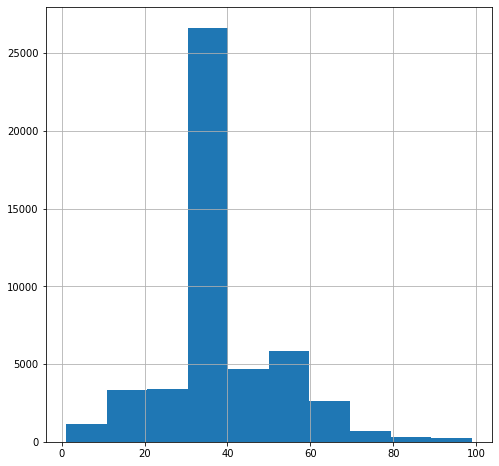

In [3]:
# Buat diagram hours-per-week
data['hours-per-week'].hist(figsize=(8,8))
plt.show()

In [4]:
data[data["hours-per-week"]>30].shape

(40991, 15)

#### ii. Deskripsi

Histogram di atas menjelaskan bahwa

- Attribut "hours-per-week" **simetris** dikarenakan bentuk kurva pada gambar di atas adalah _kurva lonceng_
- Kurva tersebut seimbang, semakin ke kanan kurva nya naik, *tetapi* semakin ke kanan pula kurva nya cenderung menurun
- Nilain "hours-per-week" tertinggi berada di 27000 jam/minggu _dan_ berada di usia 30 tahun
- Dataset ini memiliki lebih sedikit pengamatan (40991) tentang usia orang setelah usia tertentu, yaitu 30 tahun

# 2. Bivariate analysis

## 2.1 hours-per-week - income (Hubungan)

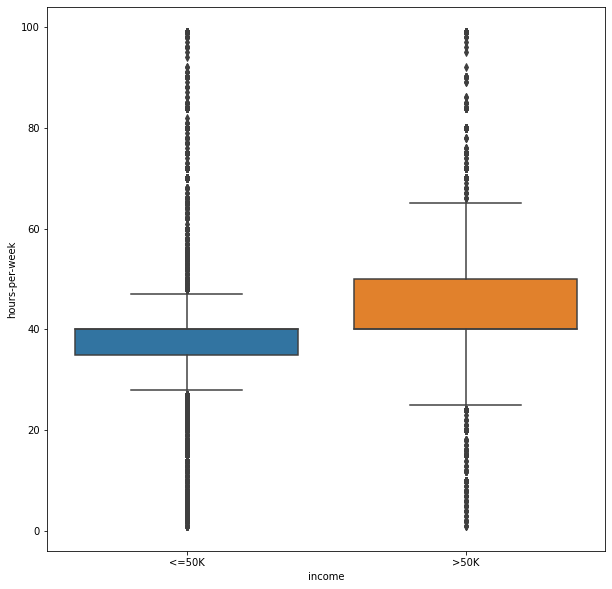

In [5]:
# Buat diagram, hubungan hours-per-week dengan income
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

In [6]:
 data[['i']]

,income,hours-per-week
1,>50K,45.452896
0,<=50K,38.840048


#### ii. Deskripsi

Bivariate Boxplot di atas menjelaskan bahwa :

- Rata-rata "kerja/jam" untuk kelompok berpenghasilan `(<=50k)` adalah sekelompok orang yang berkerja 38.840048 jam/minggu
- Rata-rata "kerja/jam" untuk kelompok berpenghasilan `(>50k)` adalah sekelompok orang yang berkerja 45.452896 

#### iii. Uji Hipotesis (untuk menguji hubungan antara hours-per-week & Income )
Dalam contoh ini kita dapat mengatakan bahwa:

     Null Hypothesis :- tidak ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.
     Alternate Hypothesis :- ada perbedaan Rerata kelompok pendapatan >50k dan kelompok pendapatan <=50k.

In [7]:
# Buat uji hipotesis untuk menentukan null atau alternate hypothesis
import random

data = data[(np.abs(stats.zscore(data["hours-per-week"])) < 3)] 

income_1 = data[data['income']=='<=50K']['hours-per-week']
income_0 = data[data['income']=='>50K']['hours-per-week']

income_0 = income_0.values.tolist()
income_0 = random.sample(income_0, 100)
income_1 = income_1.values.tolist()
income_1 = random.sample(income_1, 100)

In [8]:
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(income_1,income_0,equal_var = False)
print("ttest",ttest)
print('p value',pval)


if pval <0.05:
    print("null hypothesis ditolak")
else:
    print("null hypothesis diterima")

ttest -5.360490707401451
p value 2.4936746120304075e-07
null hypothesis ditolak


#### iv. Kesimpulan akhir

Menggunakan analisis statistik,
     
     Dapat disimpulkan bahwa terdapat perbedaan signifikan antara rata-rata pekerja yang bekerja pada jam 45.452896 jam/minggu dan 38.840048 jam/minggu. Dalam penghasilan tertinggi, yakni penghasilan >50k diarih oleh pekerja dengan jam 45.452896 jam/minggu, sedangkan pekerja dengan jam kerja 38.840048 jam/minggu memiliki penghasilan sekitar <=50k. Dengan hal ini, amak memiliki pekerjaan dengan jam/m,inggu terbanyak lah yang mendapatkan pendapatan besar